In [262]:
import pandas as pd
import numpy as np
import os 
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [263]:
# merge processed file into raw merge file for further processing
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

# create 2 columns to identify source file and if ios or android
df = pd.read_csv(root / "data" / "processed" / "merged" / "parent_clean.csv", header=0)
df.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,...,gpsP75LateralAccel,gpsP95LateralAccel,bearing_angular_change_per_second,gyro_angular_change_per_second,bearingAngleChange,gyroAngleChange,mems_radius,gps_radius,speed_gap,aggressive
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,...,0.800598,0.854956,8.662511,9.521707,67.596880,69.319600,22.941639,20.335337,-10.534279,0
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,...,1.051501,1.147173,9.708605,11.245602,80.071320,84.723694,20.737572,21.819538,3.903518,0
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,...,1.494703,1.494703,11.732657,24.616348,44.000920,105.462135,18.996666,29.467962,-2.147462,0
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,...,1.770240,1.770240,10.335592,17.929585,45.601433,57.610783,23.959110,21.440578,2.706697,0
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,...,1.698927,2.619599,11.501888,2.787075,74.401410,16.806042,91.713660,12.708904,18.208689,0


In [264]:
df.columns.tolist()

['is_ios',
 'source_file',
 'eventType',
 'eventSampleSpeed',
 'eventDurationSeconds',
 'eventMilesDriven',
 'eventSensorDetectionMthd',
 'eventGPSSignalStrength',
 'eventStartSpeed',
 'eventEndSpeed',
 'memsMedianLateralAccel',
 'memsP75LateralAccel',
 'memsP95LateralAccel',
 'memsMedianHorizontalNorm',
 'memsP75HorizontalNorm',
 'memsP95HorizontalNorm',
 'gpsMedianLateralAccel',
 'gpsP75LateralAccel',
 'gpsP95LateralAccel',
 'bearing_angular_change_per_second',
 'gyro_angular_change_per_second',
 'bearingAngleChange',
 'gyroAngleChange',
 'mems_radius',
 'gps_radius',
 'speed_gap',
 'aggressive']

In [265]:
kept_columns = [
    'is_ios',
    'source_file',
    'eventType',
    'eventSampleSpeed',
    'eventDurationSeconds',
    'eventSensorDetectionMthd',
    'eventGPSSignalStrength',
    'eventStartSpeed',
    'eventEndSpeed',
    'gpsMedianLateralAccel',
    'gpsP75LateralAccel',
    'gpsP95LateralAccel',
    'bearing_angular_change_per_second',
    'bearingAngleChange',
    'gps_radius'
]

# keep only these columns
df = df[[c for c in kept_columns if c in df.columns]]

print(df.columns.to_list())

['is_ios', 'source_file', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds', 'eventSensorDetectionMthd', 'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed', 'gpsMedianLateralAccel', 'gpsP75LateralAccel', 'gpsP95LateralAccel', 'bearing_angular_change_per_second', 'bearingAngleChange', 'gps_radius']


In [266]:
df.shape

(56784, 15)

In [267]:
df.groupby("source_file")["gpsMedianLateralAccel"].describe()

,count,mean,std,min,25%,50%,75%,max
source_file,,,,,,,,
android_turns.csv,1148.0,1.603171,0.694540,0.0,1.088627,1.590417,2.021862,6.323646
ios_turns.csv,55636.0,1.467917,1.372322,0.0,0.356600,1.230617,2.138717,37.971184


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/174572961.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


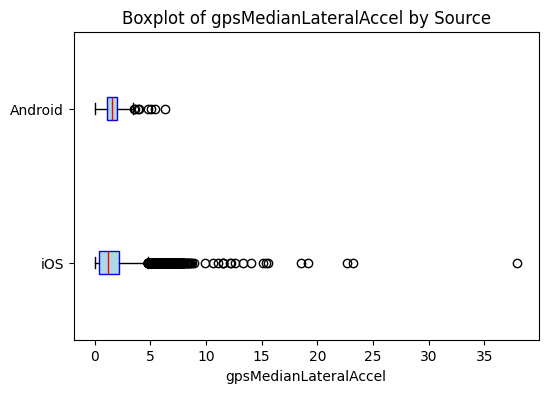

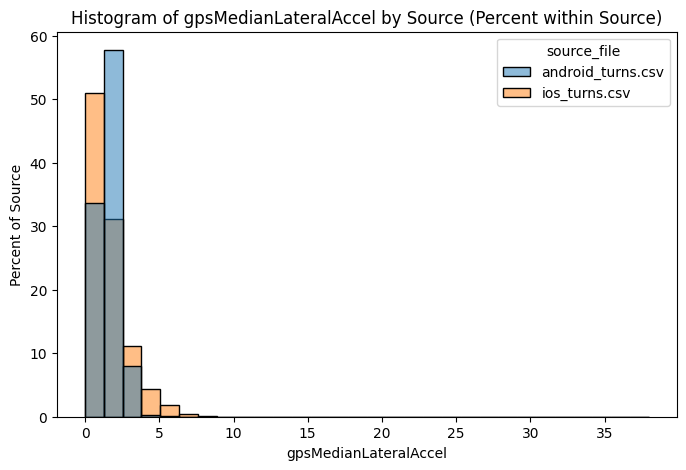

In [268]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gpsMedianLateralAccel']
android_data = df[df['is_ios'] == 0]['gpsMedianLateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsMedianLateralAccel by Source")
plt.xlabel("gpsMedianLateralAccel")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gpsMedianLateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gpsMedianLateralAccel by Source (Percent within Source)")
plt.xlabel("gpsMedianLateralAccel")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/1009266899.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


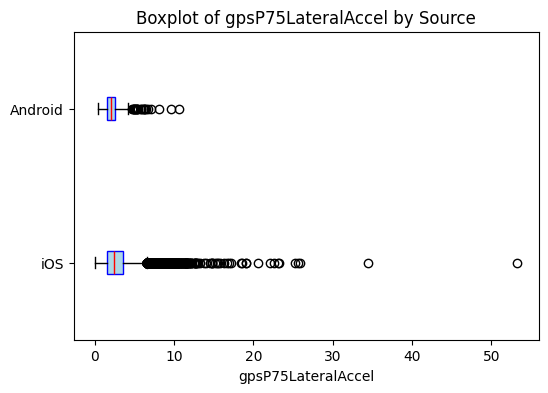

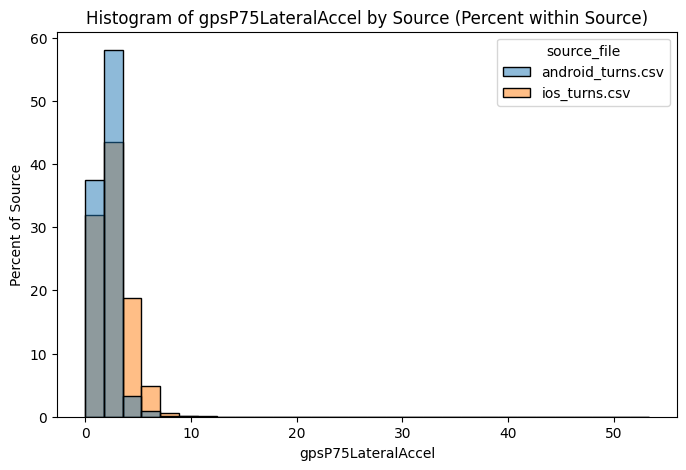

In [269]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gpsP75LateralAccel']
android_data = df[df['is_ios'] == 0]['gpsP75LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsP75LateralAccel by Source")
plt.xlabel('gpsP75LateralAccel')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gpsP75LateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gpsP75LateralAccel by Source (Percent within Source)")
plt.xlabel("gpsP75LateralAccel")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/2374491237.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


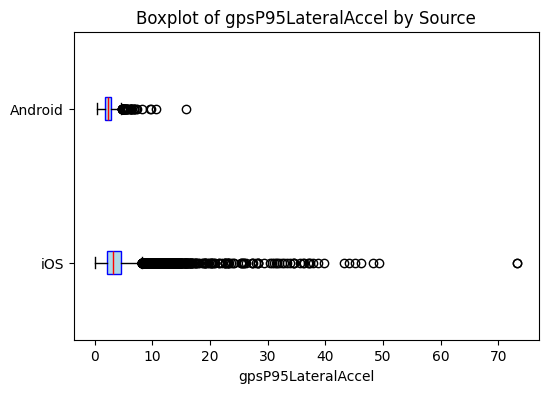

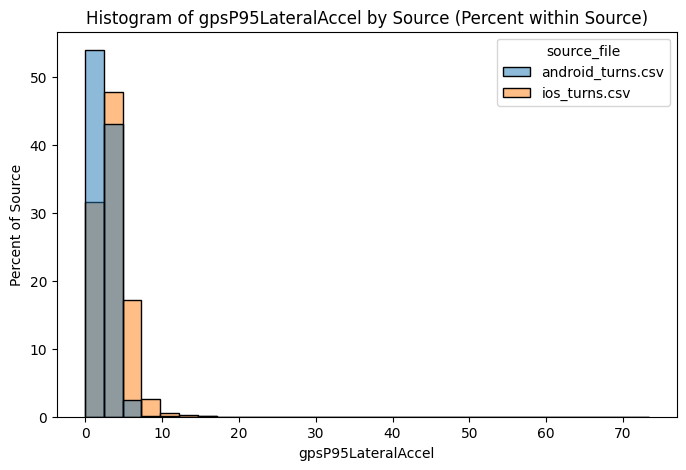

In [270]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gpsP95LateralAccel']
android_data = df[df['is_ios'] == 0]['gpsP95LateralAccel']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gpsP95LateralAccel by Source")
plt.xlabel('gpsP95LateralAccel')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gpsP95LateralAccel", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gpsP95LateralAccel by Source (Percent within Source)")
plt.xlabel("gpsP95LateralAccel")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/2686099656.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


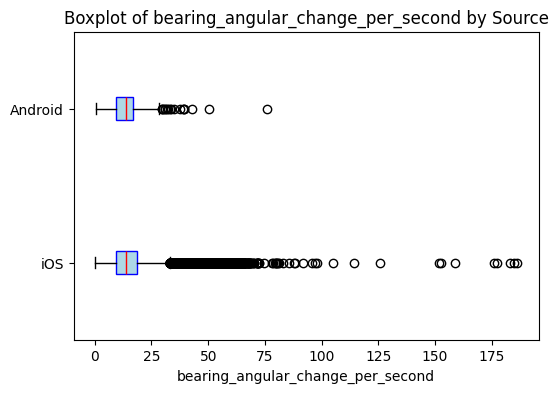

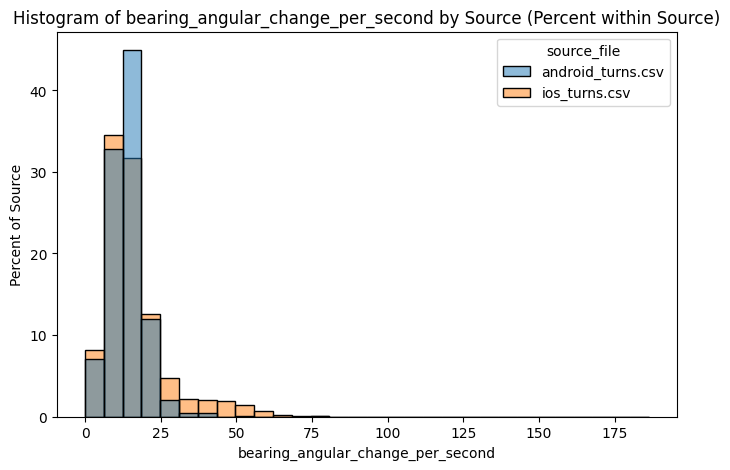

In [271]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['bearing_angular_change_per_second']
android_data = df[df['is_ios'] == 0]['bearing_angular_change_per_second']

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of bearing_angular_change_per_second by Source")
plt.xlabel('bearing_angular_change_per_second')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="bearing_angular_change_per_second", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of bearing_angular_change_per_second by Source (Percent within Source)")
plt.xlabel("bearing_angular_change_per_second")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/2691552844.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


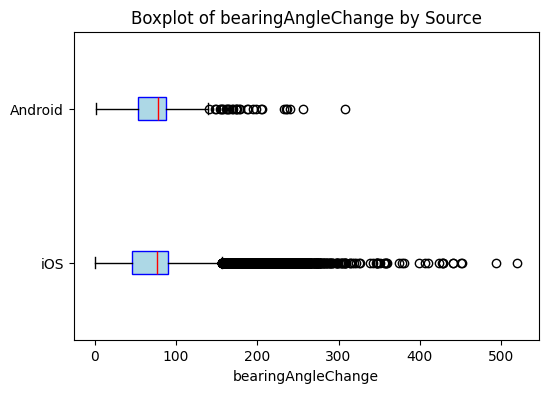

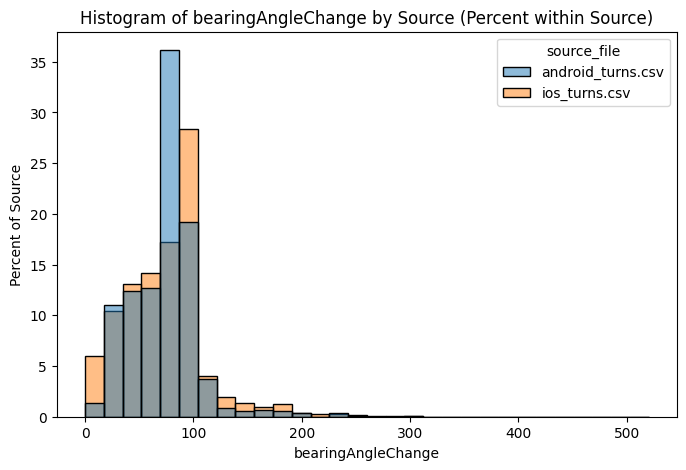

In [272]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['bearingAngleChange'].dropna()
android_data = df[df['is_ios'] == 0]['bearingAngleChange'].dropna()

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of bearingAngleChange by Source")
plt.xlabel('bearingAngleChange')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="bearingAngleChange", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of bearingAngleChange by Source (Percent within Source)")
plt.xlabel("bearingAngleChange")
plt.ylabel("Percent of Source")
plt.show()

/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/1049539862.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ios_data, android_data],


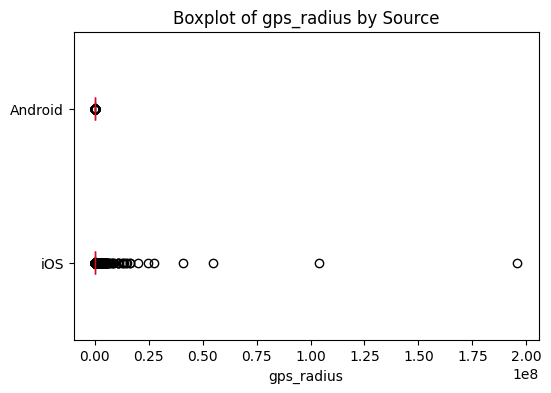

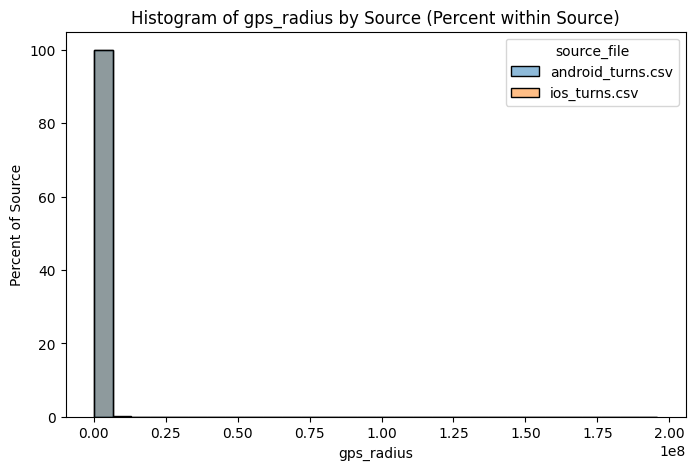

In [273]:
plt.figure(figsize=(6,4))

# Split data
ios_data = df[df['is_ios'] == 1]['gps_radius'].dropna()
android_data = df[df['is_ios'] == 0]['gps_radius'].dropna()

# Make two horizontal boxplots side by side
plt.boxplot([ios_data, android_data],
            vert=False,
            labels=["iOS", "Android"],
            patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            )

plt.title("Boxplot of gps_radius by Source")
plt.xlabel('gps_radius')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(
    data=df, 
    x="gps_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gps_radius by Source (Percent within Source)")
plt.xlabel("gps_radius")
plt.ylabel("Percent of Source")
plt.show()

In [274]:
# Find percentile where infinite values start
n_total = len(df)
n_inf = np.isinf(df['gps_radius']).sum()
percentile_start = (1 - n_inf / n_total) * 100
print(f"Infinite values start above the {percentile_start:.2f}th percentile")

Infinite values start above the 81.77th percentile


/var/folders/gb/z580gbzd2snggl2ym34nk9000000gn/T/ipykernel_58535/728822818.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


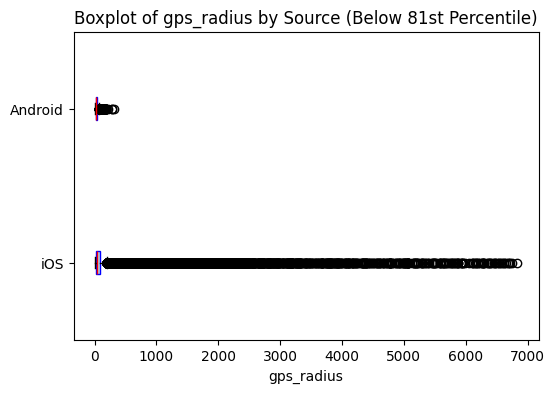

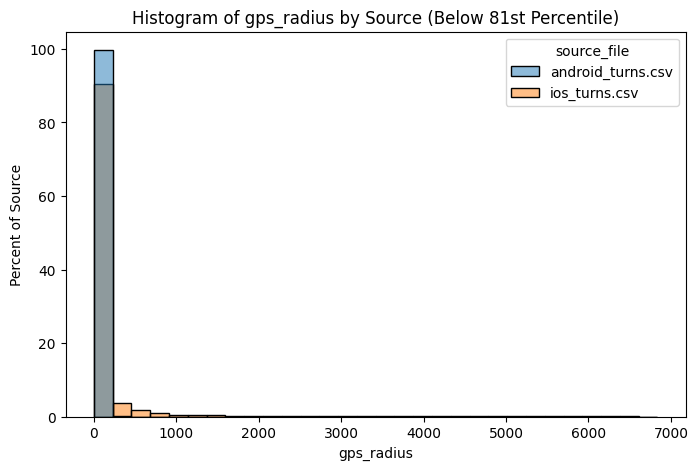

Original size: 56784
New size: 45993
Difference: 10791


In [275]:
eighty_first_percentile = df['gps_radius'].quantile(0.81)
new_df = df[df['gps_radius'] <= eighty_first_percentile].copy()

# Create box plot
plt.figure(figsize=(6,4))

# Split filtered data by source
ios_data = new_df[new_df['is_ios'] == 1]['gps_radius']
android_data = new_df[new_df['is_ios'] == 0]['gps_radius']

plt.boxplot(
    [ios_data, android_data],
    vert=False,
    labels=["iOS", "Android"],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red"),
)

plt.title("Boxplot of gps_radius by Source (Below 81st Percentile)")
plt.xlabel("gps_radius")
plt.show()

# Create histogram
plt.figure(figsize=(8,5))
sns.histplot(
    data=new_df, 
    x="gps_radius", 
    hue="source_file", 
    stat="percent",        
    common_norm=False,     
    bins=30, 
    edgecolor="black"
)

plt.title("Histogram of gps_radius by Source (Below 81st Percentile)")
plt.xlabel("gps_radius")
plt.ylabel("Percent of Source")
plt.show()

print(f"Original size: {df.shape[0]}\nNew size: {new_df.shape[0]}\nDifference: {df.shape[0] - new_df.shape[0]}")

In [276]:
# Save new_df to file to later load
new_df.to_pickle('state0_new_df.pkl')